In [0]:
%tensorflow_version 2.x

# 資料集載入

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data

(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

horse


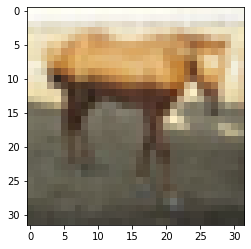

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

idx = 2000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

# 模型建立

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

layers = [
    # 27(1 filter) * 64 + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576(1 filter) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers=layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 模型編譯

In [0]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

# 歸一化

In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

# 模型訓練

In [9]:
# 存模型: model.save("xxx.h5")
# 讀取模型: 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True), # 設定 訓練停止機制
    ModelCheckpoint("cnn.h5", save_best_only=True)        # 自動儲存模型
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 4s - loss: 1.6801 - accuracy: 0.3880 - val_loss: 1.3891 - val_accuracy: 0.5224
Epoch 2/100
225/225 - 4s - loss: 1.2340 - accuracy: 0.5619 - val_loss: 1.0497 - val_accuracy: 0.6306
Epoch 3/100
225/225 - 4s - loss: 1.0481 - accuracy: 0.6326 - val_loss: 0.9311 - val_accuracy: 0.6750
Epoch 4/100
225/225 - 4s - loss: 0.9111 - accuracy: 0.6793 - val_loss: 0.8476 - val_accuracy: 0.7114
Epoch 5/100
225/225 - 4s - loss: 0.8237 - accuracy: 0.7116 - val_loss: 0.7762 - val_accuracy: 0.7320
Epoch 6/100
225/225 - 4s - loss: 0.7428 - accuracy: 0.7406 - val_loss: 0.7567 - val_accuracy: 0.7368
Epoch 7/100
225/225 - 4s - loss: 0.6832 - accuracy: 0.7612 - val_loss: 0.7203 - val_accuracy: 0.7576
Epoch 8/100
225/225 - 4s - loss: 0.6062 - accuracy: 0.7871 - val_loss: 0.7234 - val_accuracy: 0.7562
Epoch 9/100
225/225 - 4s - loss: 0.5577 - accuracy: 0.8023 - val_loss: 0.6535 - val_accuracy: 0.7760
Epoch 10/100
225/225 - 4s - loss: 0.5003 - accuracy: 0.8229 - val_loss: 0.6987 - val_accura

# 模型驗證

In [10]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6984 - accuracy: 0.7624


[0.6983582973480225, 0.7623999714851379]

# 模型預測

In [11]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 8, 8, ..., 5, 4, 7])

In [12]:
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


# 混淆矩陣

In [13]:
import pandas as pd
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test_reshape, pre)
c = ["{}(預測)".format(i) for i in trans]
i = ["{}(真實)".format(i) for i in trans]
pd.DataFrame(mat, columns=c, index=i)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),824,17,34,5,20,6,7,13,39,35
automobile(真實),16,868,6,8,3,1,9,2,16,71
bird(真實),64,4,655,35,84,66,51,28,7,6
cat(真實),17,10,89,531,71,149,75,33,8,17
deer(真實),17,3,50,37,741,26,51,65,6,4
dog(真實),8,3,53,150,43,651,22,53,11,6
frog(真實),5,3,36,37,41,16,846,7,5,4
horse(真實),10,2,31,25,51,52,5,814,3,7
ship(真實),59,23,13,9,6,8,10,1,852,19
truck(真實),31,51,7,13,6,6,7,13,24,842


# 觀察預測錯誤的圖形

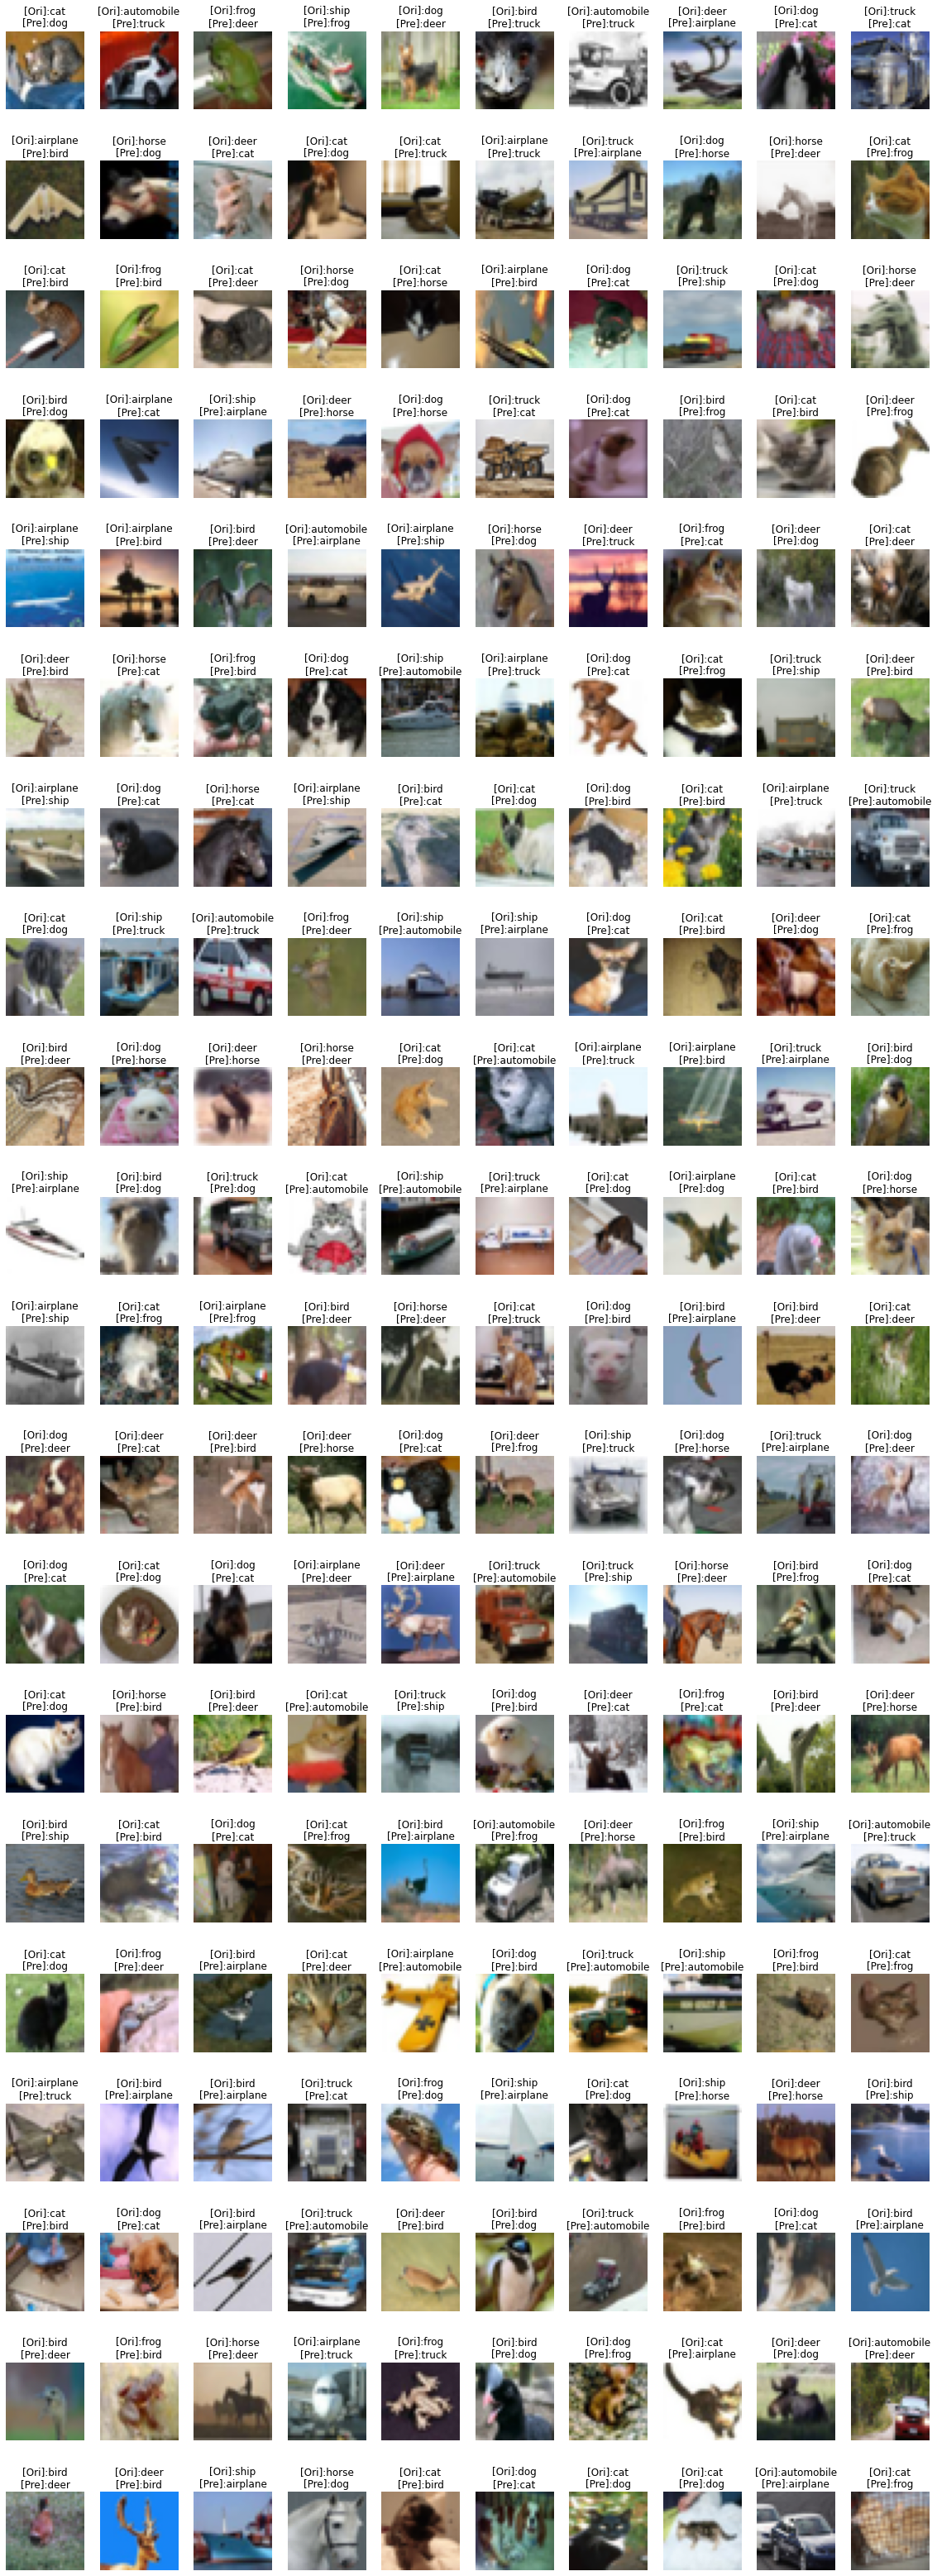

In [14]:
import numpy as np

# nonzero: 取出是 True 的 index
# (x座標, y座標, z座標)
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
# 預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test_reshape[idx]
false_predict = pre[idx]

# 把圖變大一點才塞的下
plt.figure(figsize=(20, 60))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[Ori]:{}\n[Pre]:{}".format(trans[false_answer[i]],
                                    trans[false_predict[i]])
    plt.title(t)
    plt.imshow(img)

# 使用者提供圖形，進行模型辨識測試

輸入檔名:horse.jpg
應該是: horse


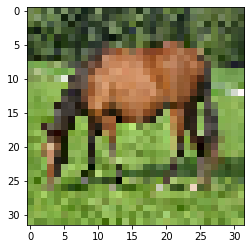

In [16]:
from tensorflow.keras.preprocessing.image import load_img

fn = input("輸入檔名:")
img = load_img(fn, target_size=(32, 32))
# 剛剛帶入 (10000, 784)
# 現在帶入 (1, 784)
img_norm = np.array(img).reshape(1, 32, 32, 3) / 255
ans = model.predict_classes(img_norm)[0]
print("應該是:", trans[ans])
plt.imshow(img)

# 載入模型進行驗證

In [17]:
# 讀取 model
from tensorflow.keras.models import load_model
loaded = load_model("cnn.h5") 
# 讀取完以後 1. predict 2. fit(不用 compile)
loaded.evaluate(x_test_norm, y_test)
# 如果你想看 h5 https://support.hdfgroup.org/products/java/release/download.html

313/313 [==============================] - 1s 3ms/step - loss: 0.6984 - accuracy: 0.7624


[0.6983582973480225, 0.7623999714851379]